# EDA of 1300+ Towards DataScience Medium Articles Dataset

### Overview

This dataset is a comprehensive collection of blog posts sourced from Medium, focusing specifically on articles published under the "Towards Data Science" publication. It consists of two primary columns:

- **Title:** Contains the title of each blog post, providing a concise summary of the content and facilitating tasks such as title-based classification, keyword extraction, and trend analysis.
  
- **Text:** Contains the full text content of each blog post, offering detailed information and insights on various topics in Data Science. This column serves as a valuable resource for Natural Language Processing (NLP) tasks including sentiment analysis, topic modeling, text classification, information extraction, text generation, and recommendation systems.


### Imports

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from langdetect import detect

### Loading & analyzing the data sctructure

In [2]:
data = pd.read_csv('ds-medium-articles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1391 non-null   object
 1   Text    1391 non-null   object
dtypes: object(2)
memory usage: 21.9+ KB


In [4]:
data.describe().T

,count,unique,top,freq
Title,1391,1390,Autonomous Agents And Multi-Agent Systems 101:...,2
Text,1391,1391,1. Introduction of Word2vec\n\nWord2vec is one...,1


Title column contains a duplicate, unlike text column. These rows should be located and inspected.

In [5]:
data.head()

,Title,Text
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...


#### Checking language consistency

In [6]:
data['Text'].apply(detect).value_counts()

Text
en    1391
Name: count, dtype: int64

#### Checking article content

In [7]:
print(data.iloc[0].Text[:2000])

1. Introduction of Word2vec

Word2vec is one of the most popular technique to learn word embeddings using a two-layer neural network. Its input is a text corpus and its output is a set of vectors. Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities. A well-trained set of word vectors will place similar words close to each other in that space. For instance, the words women, men, and human might cluster in one corner, while yellow, red and blue cluster together in another.

There are two main training algorithms for word2vec, one is the continuous bag of words(CBOW), another is called skip-gram. The major difference between these two methods is that CBOW is using context to predict a target word while skip-gram is using a word to predict a target context. Generally, the skip-gram method can have a better performance compared with CBOW method, for it can capture tw

### Title

#### Length of titles (tokens)

In [8]:
df_title_len = pd.concat([data['Title'], data['Title'].apply(lambda x: len(word_tokenize(x))).rename('Length')], axis=1)
df_title_len.sort_values(by='Length', ascending=False)

,Title,Length
1357,Stock Market Prediction for the Australian Sec...,27
443,Using Naive Bayes to dig into “81% of ‘suspect...,24
592,"Year two of living my dream in Silicon Valley,...",22
82,"What Is Neuralink: A Look At What It Is, What ...",22
100,How 90% of Drivers Can be “Above Average” or W...,21
...,...,...
1258,Image-to-Image Translation,2
141,Subspace clustering,2
1015,Serverless ML,2
34,Multi-Class Imbalance,2


#### Visualization of title length

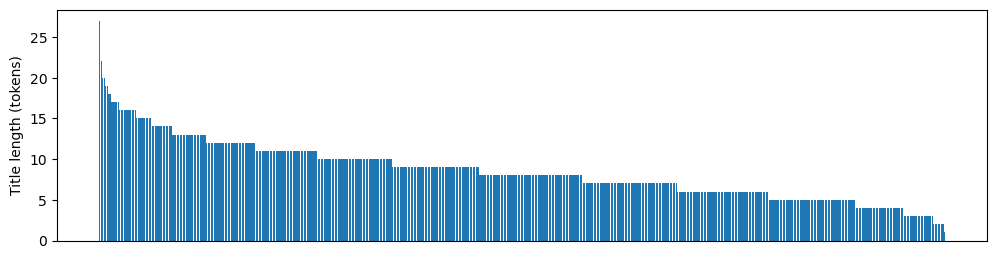

In [9]:
plt.figure(figsize=(12, 3))
plt.bar(range(len(df_title_len['Length'])), df_title_len['Length'].sort_values(ascending=False))
plt.ylabel('Title length (tokens)')
plt.xticks([])
plt.show()

#### Duplicated titles

In [10]:
df_title_len['Title'][df_title_len['Title'].duplicated(keep=False)]

328    Autonomous Agents And Multi-Agent Systems 101:...
616    Autonomous Agents And Multi-Agent Systems 101:...
Name: Title, dtype: object

### Text

#### Length of texts (tokens)

In [11]:
df_text_len = pd.concat([data['Text'], data['Text'].apply(lambda x: len(word_tokenize(x))).rename('Length')], axis=1)
df_text_len.sort_values(by='Length', ascending=False)

,Text,Length
65,R and Python are the bread and butter of today...,9201
233,Models as Serverless Functions\n\nI recently p...,8090
1146,Comparing common analysis strategies for repea...,7455
866,Intelligence can be defined as a predominantly...,6587
750,How are the predicted food trends of 2019 hold...,6404
...,...,...
678,Review: NIN — Network In Network (Image Classi...,84
18,20 must-know Data Science Interview Questions\...,82
69,Review: DeepPose — Cascade of CNN (Human Pose ...,78
286,Notice that we normalize the validation set wi...,61


#### Visualization of text length

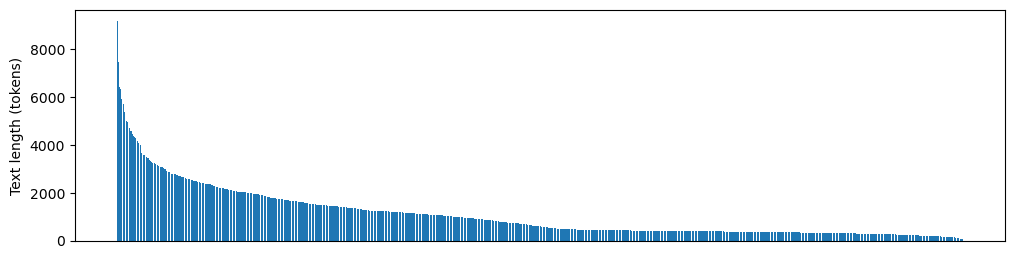

In [12]:
plt.figure(figsize=(12, 3))
plt.bar(range(len(df_text_len['Length'])), df_text_len['Length'].sort_values(ascending=False))
plt.ylabel('Text length (tokens)')
plt.xticks([])
plt.show()

#### Checking the content of text with duplicate titles

In [13]:
df_text_len.iloc[[328, 616], :]

,Text,Length
328,Autonomous Agents And Multi-Agent Systems 101:...,1772
616,Autonomous Agents And Multi-Agent Systems 101:...,1774


In [14]:
edit_dist = nltk.edit_distance(df_text_len.iloc[328].Text, df_text_len.iloc[616].Text)
print(f'Edit-distance between duplicates: {edit_dist}')

Edit-distance between duplicates: 17


In [15]:
set_1 = set(word_tokenize(df_text_len.iloc[328].Text))
set_2 = set(word_tokenize(df_text_len.iloc[616].Text))
set_1.symmetric_difference(set_2)

{'27',
 '9',
 'May',
 'Nov',
 'behaviors',
 'behaviours',
 'favorable',
 'favourable',
 'fulfil',
 'fulfill',
 'optimality',
 're-usability',
 'reusability',
 '😶',
 '🤖'}

In [16]:
df_text_len.iloc[328].Text[:340]

'Autonomous Agents And Multi-Agent Systems 101: Agents And Deception\n\nThis article provides a brief introduction to the area of autonomous agents and multi-system agents. Furthermore, a perspective of deception mechanisms used by agents is presented. Rafael Belchior · Follow Published in Towards Data Science · 7 min read · Nov 9, 2019 -- L'

In [17]:
df_text_len.iloc[616].Text[:340]

'Autonomous Agents And Multi-Agent Systems 101: Agents And Deception\n\nThis article provides a brief introduction to the area of autonomous agents and multi-system agents. Furthermore, a perspective of deception mechanisms used by agents is presented. Rafael Belchior · Follow Published in Towards Data Science · 7 min read · May 27, 2019 -- '

##### Conclusions

The main difference between these texts is the date of publication. The rest of the differences indicate minor editing that does not affect the context of the text.

Therefore, I will keep the updated text and remove the previous version of the article from the dat.a

In [18]:
data.drop(616, inplace=True)

### Update data file

In [19]:
data.to_csv('ds-medium-articles.csv')

### Conclusions of EDA

I have came up with few ideas and conclusions during the analysis:

- Titles let me spot some duplicate but for now I don't see the need to use them in retrieval system.
- Number of text tokens are up to  9000, so there will be need to develop efficient and effective chunking method.
- Every article is written in English, what simplifies work with text data and excludes the use of multilingual embeddings.
- Some of the articles contains python code, so there may be need to use tokenizer and transformer adapted to work with code.